In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats

## A/B Testing for Two Independent Samples

Used when a comparison is made between two group averages.

Assumptions:
1) Normal distribution

2) variance homogeneity = It expresses that the variances of the groups are similar to each other.


Hypothesis


H0: M1 = M2 

H1: M1 != M2

Example: in the retail website they implement a new system with ML then they want to compare that the revenue of first system and ML system.

Details: 
Group A represent old system group B represent the new system(integrated with ML)
They want to measure whether income is growing or not.

Confident interval is %95 so alpha is (0.05)


In [28]:
# Data type 1

In [37]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [38]:
# Data type 2

In [42]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#B and Group of B
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"
A = pd.concat([A, GROUP_A], axis = 1)

#B and Group of B
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"
B = pd.concat([B, GROUP_B], axis = 1)

#All Data
AB = pd.concat([A,B])
AB.columns = ["income","GROUP"]
print(AB.head())
print(AB.tail())

   income GROUP
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    income GROUP
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


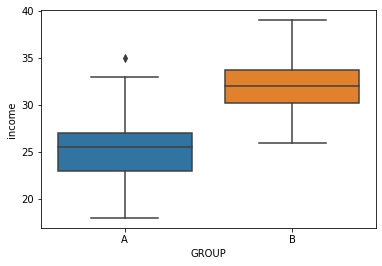

In [43]:
sns.boxplot(data=AB,x ="GROUP", y = "income");
# we can see here the mean of B is grater than mean of A if we deny H0: M1 = M2 we can say this system B is better than A

In [33]:
## Check of Assumption

In [34]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [35]:
AB.head()

,income,GROUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


### Normal Distribution Conjecture ( Using Shapiro-Wilks test)

Shapiro hypothesis:

H0:There is no statistically significant difference between sample distribution and theoretical normal distribution.

H1:There is statistically significant difference between sample distribution and theoretical normal distribution.

In [46]:
from scipy.stats import shapiro

In [47]:
shapiro(A_B.A) #this test accept only one variable

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

İn this case our P-value is 0.79 and its greater than alpha(0.05) we can't deny the HO hypothesis so our normal distribution assumption is satisfied

In [48]:
shapiro(A_B.B) #this test accept only one variable

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

İn this case our P-value is 0.24 and its greater than alpha(0.05) we can't deny the HO hypothesis so our normal distribution assumption is satisfied

### Variance Homogeneity

HO: variances are homogeneous

H1: variances are not homogeneous

we are going to use Levene test it is  inferential statistic used to assess the equality of variances for a variable calculated for two or more groups

In [51]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

İn this case our P-value is 0.29 and its greater than alpha(0.05) we can't deny the HO

## Hypothesis Test

In [52]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

H0: M1 = M2 

H1: M1 != M2

İn this case our P-value is 0.0000.. and its less than alpha(0.05) we can deny the HO

With 95% confidence level, there is found a statistically significant difference between the old system and the new system considering the incomes ant  at this position ML system is in favor.

## A/B Testing for Two Independent Samples

It is used when it is desired to make a comparison between two dependent group means. There is dependence when two different applications are applied to the same sample and the results are examined.

Assumptions:
1) Normal distribution

2) variance homogeneity = It expresses that the variances of the groups are similar to each other.

Hypothesis


H0: M1 = M2 

H1: M1 != M2

Example: The company receives an external training for its employees. They wanted to measure whether education provides added value or not.

Necessary measurements are made before and after the training.

Hypothesis

H0: Mb = Ma

H1: Mb != Ma


In [53]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
            130,130,130,132,117,130,125,129,133,120,127,123])

In [55]:
#first data set
separate = pd.concat([before, after], axis = 1)
separate.columns = ["BEFORE","AFTER"]
print("'SEPARATE' Data Set: \n\n ", separate.head(), "\n\n")


#second data set
#before FLAG/TAG creating
group_before = np.arange(len(before))
group_before = pd.DataFrame(group_before)
group_before[:] = "BEFORE"
# combining flag and before 
A = pd.concat([before, group_before], axis = 1)
#after FLAG/TAG'creating
group_after = np.arange(len(after))
group_after = pd.DataFrame(group_after)
group_after[:] = "AFTER"

#combining flag and after
B = pd.concat([after, group_after], axis = 1)

#Bringing all data together
TOGETHER = pd.concat([A,B])


#NAMİNG
TOGETHER.columns = ["PERFORMANCE","BEFORE_AFTER"]
print("'together' Veri Seti: \n\n", TOGETHER.head(), "\n")

'SEPARATE' Data Set: 

     BEFORE  AFTER
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 


'together' Veri Seti: 

    PERFORMANCE BEFORE_AFTER
0          123       BEFORE
1          119       BEFORE
2          119       BEFORE
3          116       BEFORE
4          123       BEFORE 



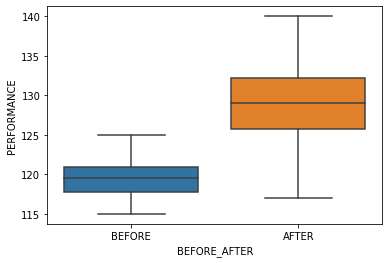

In [57]:
sns.boxplot(data = TOGETHER, x="BEFORE_AFTER", y= "PERFORMANCE");

### Normal Distribution Conjecture ( Using Shapiro-Wilks test)

Shapiro hypothesis:

H0:There is no statistically significant difference between sample distribution and theoretical normal distribution.

H1:There is statistically significant difference between sample distribution and theoretical normal distribution.

In [59]:
shapiro(separate.BEFORE)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

İn this case our P-value is 0.107 and its greater than alpha(0.05) we can't deny the HO hypothesis so our normal distribution assumption is satisfied

In [60]:
shapiro(separate.AFTER)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

İn this case our P-value is 0.615 and its greater than alpha(0.05) we can't deny the HO hypothesis so our normal distribution assumption is satisfied

Variance Homogeneity
HO: variances are homogeneous

H1: variances are not homogeneous

we are going to use Levene test it is inferential statistic used to assess the equality of variances for a variable calculated for two or more groups

In [61]:
stats.levene(separate.BEFORE,separate.AFTER)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

İn this case our P-value is 0.005 and its less than alpha(0.05) we can deny the HO
so variance homogeneity assumption not satisfied. 

Like this situation;

1) If there are some discrepancies on the data set, these assumptions can be re-examined by making certain arrangements.

2)  Sometimes it is negligible


For now, we will do the relevant test, ignoring the variance homogeneity assumption.

In [63]:
### HYPOTHESİS TEST

In [62]:
stats.ttest_rel(separate.BEFORE,separate.AFTER)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

H0: Mb = Ma

H1: Mb != Ma

İn this case our P-value is 0.0000.. and its less than alpha(0.05) we can deny the HO